<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Import-and-Analysis" data-toc-modified-id="Import-and-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and Analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-description:" data-toc-modified-id="Dataset-description:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset description:</a></span></li><li><span><a href="#Data-Investigation-and-Cleaning" data-toc-modified-id="Data-Investigation-and-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Investigation and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Administrative" data-toc-modified-id="Administrative-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Administrative</a></span></li><li><span><a href="#Administrative-Duration" data-toc-modified-id="Administrative-Duration-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Administrative Duration</a></span></li><li><span><a href="#Informational" data-toc-modified-id="Informational-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Informational</a></span></li><li><span><a href="#Informational-Duration" data-toc-modified-id="Informational-Duration-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Informational Duration</a></span></li><li><span><a href="#Product-Related" data-toc-modified-id="Product-Related-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Product Related</a></span></li><li><span><a href="#Product-Related-Duration" data-toc-modified-id="Product-Related-Duration-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Product Related Duration</a></span></li><li><span><a href="#Bounce-Rates" data-toc-modified-id="Bounce-Rates-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Bounce Rates</a></span></li><li><span><a href="#Exit-Rates" data-toc-modified-id="Exit-Rates-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Exit Rates</a></span></li><li><span><a href="#Page-Values" data-toc-modified-id="Page-Values-2.2.9"><span class="toc-item-num">2.2.9&nbsp;&nbsp;</span>Page Values</a></span></li><li><span><a href="#Special-Day" data-toc-modified-id="Special-Day-2.2.10"><span class="toc-item-num">2.2.10&nbsp;&nbsp;</span>Special Day</a></span></li><li><span><a href="#Month" data-toc-modified-id="Month-2.2.11"><span class="toc-item-num">2.2.11&nbsp;&nbsp;</span>Month</a></span></li><li><span><a href="#Operating-Systems" data-toc-modified-id="Operating-Systems-2.2.12"><span class="toc-item-num">2.2.12&nbsp;&nbsp;</span>Operating Systems</a></span></li><li><span><a href="#Browser" data-toc-modified-id="Browser-2.2.13"><span class="toc-item-num">2.2.13&nbsp;&nbsp;</span>Browser</a></span></li><li><span><a href="#Region" data-toc-modified-id="Region-2.2.14"><span class="toc-item-num">2.2.14&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#Traffic-type" data-toc-modified-id="Traffic-type-2.2.15"><span class="toc-item-num">2.2.15&nbsp;&nbsp;</span>Traffic type</a></span></li><li><span><a href="#Visitor-Type" data-toc-modified-id="Visitor-Type-2.2.16"><span class="toc-item-num">2.2.16&nbsp;&nbsp;</span>Visitor Type</a></span></li><li><span><a href="#Weekend" data-toc-modified-id="Weekend-2.2.17"><span class="toc-item-num">2.2.17&nbsp;&nbsp;</span>Weekend</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-2.2.18"><span class="toc-item-num">2.2.18&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Correlation</a></span><ul class="toc-item"><li><span><a href="#Correlation-insights:" data-toc-modified-id="Correlation-insights:-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>Correlation insights:</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Individual-work-to-organize" data-toc-modified-id="Individual-work-to-organize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Individual work to organize</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Administrative_duration" data-toc-modified-id="Administrative_duration-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Administrative_duration</a></span></li><li><span><a href="#BounceRates" data-toc-modified-id="BounceRates-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>BounceRates</a></span></li><li><span><a href="#OperatingSystems" data-toc-modified-id="OperatingSystems-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>OperatingSystems</a></span></li><li><span><a href="#Weekend" data-toc-modified-id="Weekend-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Weekend</a></span></li><li><span><a href="#Kristina:" data-toc-modified-id="Kristina:-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Kristina:</a></span><ul class="toc-item"><li><span><a href="#Informational" data-toc-modified-id="Informational-3.0.5.1"><span class="toc-item-num">3.0.5.1&nbsp;&nbsp;</span>Informational</a></span></li><li><span><a href="#Exit-Rates" data-toc-modified-id="Exit-Rates-3.0.5.2"><span class="toc-item-num">3.0.5.2&nbsp;&nbsp;</span>Exit Rates</a></span></li><li><span><a href="#Browser" data-toc-modified-id="Browser-3.0.5.3"><span class="toc-item-num">3.0.5.3&nbsp;&nbsp;</span>Browser</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-3.0.5.4"><span class="toc-item-num">3.0.5.4&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Isaac:" data-toc-modified-id="Isaac:-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Isaac:</a></span></li><li><span><a href="#Pau:" data-toc-modified-id="Pau:-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Pau:</a></span></li><li><span><a href="#Sosa:" data-toc-modified-id="Sosa:-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Sosa:</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression


# Functions

In [2]:
## Function to explain NA values in a column:

def NA_values(series):
    '''
    Function that takes a Pandas Series and returns a print statement explaining NAs and % of the column
    '''
    
    return print(f'Column name: {series.name}\nTotal values: {int(series.count())}\nNA values: {series.isna().sum()}\n% of NA values: {round(series.isna().mean() * 100,2)}%')

In [3]:
## Function to get the information about the outliers of a column:

def iqr(dataset, series):
    """
    Function takes dataset and column and returns the information about the outliers.
    Input:
        - dataset, e.g. data
        - series, e.g. data.Price, important to use this format!
    """
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    total_outliers = len(dataset.loc[(series > upper) | (series < lower)])
    percent_outliers = total_outliers / len(dataset) * 100
    
    return print(f'Column: {series.name}\nLower outliers: all values lower than {round(lower, 3)}\nUpper outliers: all values higher than {round(upper, 3)}\nTotal number of rows with outliers: {total_outliers}\n% of outliers: {round(percent_outliers, 2)}%')

# Import and Analysis

In [4]:
original = pd.read_csv('data/online_shoppers_intention_DATAPTDIC19.csv', sep=',', index_col=0)

In [5]:
data = original.copy()

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1.0,1,1.0,Returning_Visitor,0.0,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,1,2.0,Returning_Visitor,0.0,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,9,3.0,Returning_Visitor,0.0,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2,4.0,Returning_Visitor,0.0,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1,4.0,Returning_Visitor,1.0,False


In [7]:
data.shape

(12330, 18)

In [8]:
data.describe()

,Administrative,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Browser,TrafficType
count,12296.000000,12316.000000,12196.000000,12316.000000,12216.000000,12316.000000,12330.000000,12230.000000,12210.000000
mean,10.428351,0.503979,31.739259,1196.037057,0.027052,0.043003,0.061427,2.350613,4.062899
std,89.580739,1.270701,44.468360,1914.372511,0.129758,0.048527,0.198917,1.720863,4.016304
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,2.000000,2.000000
50%,1.000000,0.000000,18.000000,599.766190,0.003175,0.025124,0.000000,2.000000,2.000000
75%,4.000000,0.000000,38.000000,1466.479902,0.017027,0.050000,0.000000,2.000000,4.000000
max,999.000000,24.000000,705.000000,63973.522230,3.000000,0.200000,1.000000,13.000000,20.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12296 non-null float64
Administrative_Duration    12316 non-null object
Informational              12316 non-null float64
Informational_Duration     12316 non-null object
ProductRelated             12196 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12216 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12310 non-null object
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12230 non-null float64
Region                     12230 non-null object
TrafficType                12210 non-null float64
VisitorType                12310 non-null object
Weekend                    12310 non-null object
Revenue                    12330 non-null bool
dt

## Dataset description:
 - Administrative:`float`. Administrative Value. `yet to identify`.
 - Administrative_Duration: `object`. Duration in Administrative Page. `Identify values and change dtype accordingly`. 
 - Informational: `float`. Informational Value. `yet to identify` 
 - Informational_Duration: `object`. Duration in Informational Page. `Identify values and change dtype accordingly.`
 - ProductRelated: `float.` Product Related Value. `yet to identify` 
 - ProductRelated_Duration: `float`. Duration in Product Related Page. 
 - BounceRates: `float`. Bounce Rates of a web page. Percentages. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
 - ExitRates: `float`. Exit rate of a web page. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
 - PageValues: `object`. Page values of each web page. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. `Identify values and change dtype accordingly.` 
 - SpecialDay: Special days like valentine etc. `float`. Closeness to a special date. `dtype correct`. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
 - Month: Month of the year. `object`. String to identify the month of the year. `clean`. 
 - OperatingSystems: Operating system used. `object`. `Try to explain the values`. 
 - Browser: Browser used. `float` 
 - Region: Region of the user. `object`. 
 - TrafficType: Traffic Type. `float`.  
 - VisitorType: Types of Visitor `object` 
 - Weekend: Weekend or not `object`, `Identify values and change dtype accordingly`.   
 - Revenue: Revenue will be generated or not `bool`.
     

## Data Investigation and Cleaning

- **Administrative**
    - 999.0 probably move to nan, can't be that visited 999 times the page
- **Administrative_Duration**
    - change object type to float
    - move -99 and -1.0 values to nan
- **Informational_Duration**
    - change object type to float
    - change -1.0 to nan
    - change None to nan
- **ProductRelated_Duration**
    - change -1.0 values to Nan
- **Page Values**
    - change object type to float
    - #Nan change to Nan
- **Month**
    - change MAY to May and March to Mar
- **OperatingSystems**
    - change -999 and ? to Nan
- **Browser**
    - change -1 to Nan or it's a separate category of a browser?
- **Region**
    - change Nan to np.nan
- **VisitorType**
    - unify more to other or change both to Nan?
- **Weekend**
    - change object type to bool
    - change weekdays to 0 and 1

In [10]:
# Show all values of the dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### Administrative

In [11]:
data.Administrative.unique()

array([  0.,   1.,   2., 999.,   4.,  12.,   3.,  10.,   6.,   5.,   9.,
         8.,  16.,  13.,  11.,   7.,  nan,  18.,  14.,  17.,  19.,  15.,
        24.,  22.,  21.,  20.,  23.,  27.,  26.])

In [12]:
data.Administrative.value_counts()

0.0      5694
1.0      1338
2.0      1104
3.0      909 
4.0      756 
5.0      567 
6.0      430 
7.0      333 
8.0      285 
9.0      225 
10.0     153 
11.0     105 
999.0    100 
12.0     85  
13.0     56  
14.0     43  
15.0     38  
16.0     24  
17.0     16  
18.0     12  
19.0     6   
24.0     4   
22.0     4   
23.0     3   
20.0     2   
21.0     2   
26.0     1   
27.0     1   
Name: Administrative, dtype: int64

In [13]:
data['AnyPage'] = data['Administrative'] + data['Informational'] + data['ProductRelated']

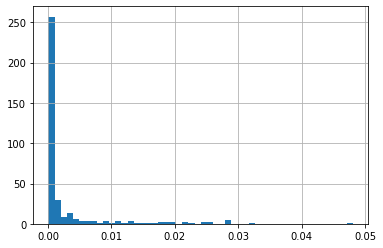

In [14]:
data['AnyPage'].value_counts(normalize= True).hist(bins=50)

In [15]:
# Checking 999 values

data999 = data.loc[data.Administrative == 999.0]
print(len(data999))
data999

100


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
18,999.0,0.0,0.0,0.0,2.0,32.000000,0.000000,0.100000,0.0,0.0,Feb,2,2.0,1,3.0,Returning_Visitor,0.0,False,1001.0
53,999.0,0.0,0.0,0.0,4.0,160.000000,0.000000,0.075000,0.0,0.0,Feb,4,2.0,2,3.0,Returning_Visitor,0.0,False,1003.0
373,999.0,3.0,14.0,1165.166667,81.0,2820.952419,0.008897,0.029431,0.0,0.0,Mar,2,2.0,3,2.0,Returning_Visitor,0.0,False,1094.0
398,999.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Mar,2,4.0,1,1.0,Returning_Visitor,0.0,False,1000.0
526,999.0,34.0,0.0,0.0,21.0,521.500000,0.018182,0.021212,0.0,0.0,Mar,3,2.0,5,1.0,Returning_Visitor,1.0,False,1020.0
597,999.0,0.0,0.0,0.0,30.0,390.666667,0.006667,0.056667,0.0,0.0,Mar,2,6.0,6,1.0,Returning_Visitor,0.0,False,1029.0
807,999.0,0.0,0.0,0.0,8.0,244.000000,0.025000,0.075000,0.0,0.0,Mar,3,2.0,1,3.0,Returning_Visitor,0.0,False,1007.0
893,999.0,0.0,0.0,0.0,9.0,324.500000,0.014815,0.022222,0.0,0.0,Mar,1,2.0,6,1.0,Returning_Visitor,0.0,False,1008.0
1073,999.0,177.16666669999998,0.0,0.0,50.0,1188.566667,0.007843,0.018301,0.0,0.0,Mar,2,2.0,3,3.0,Returning_Visitor,0.0,False,1049.0
1098,999.0,0.0,0.0,0.0,6.0,308.166667,0.083333,0.095000,0.0,0.0,Mar,1,1.0,6,1.0,Returning_Visitor,0.0,False,1005.0


- 999.0 probably move to nan, can't be that visited 999 times the page

In [16]:
# Percenatge of revenue per 999 values:

data999.Revenue.value_counts(normalize = True)*100

False    86.0
True     14.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [17]:
data.Administrative = data.Administrative.replace(999.0, np.nan)

In [18]:
data.Administrative.value_counts()

0.0     5694
1.0     1338
2.0     1104
3.0     909 
4.0     756 
5.0     567 
6.0     430 
7.0     333 
8.0     285 
9.0     225 
10.0    153 
11.0    105 
12.0    85  
13.0    56  
14.0    43  
15.0    38  
16.0    24  
17.0    16  
18.0    12  
19.0    6   
24.0    4   
22.0    4   
23.0    3   
20.0    2   
21.0    2   
26.0    1   
27.0    1   
Name: Administrative, dtype: int64

### Administrative Duration

In [19]:
data.Administrative_Duration.unique()

array(['0.0', '-1.0', '53.0', ..., '167.91071430000002', '305.125',
       '150.3571429'], dtype=object)

In [20]:
data.Administrative_Duration.value_counts()

0.0                   5805
-99                   100 
4.0                   56  
5.0                   53  
7.0                   44  
11.0                  42  
6.0                   41  
14.0                  37  
9.0                   35  
15.0                  33  
-1.0                  33  
10.0                  31  
13.0                  29  
19.0                  29  
21.0                  28  
12.0                  28  
3.0                   26  
20.0                  25  
17.0                  25  
18.0                  25  
8.0                   25  
37.0                  24  
23.0                  24  
33.0                  20  
26.0                  20  
?                     20  
47.0                  19  
32.0                  19  
34.0                  19  
36.0                  18  
28.0                  18  
16.0                  18  
29.0                  18  
45.0                  17  
42.0                  17  
30.0                  16  
27.0                  16  
4

In [21]:
# Checking negative values (ignoring nans)

data_negative = data.loc[data.Administrative_Duration.str.contains('-', na = False)]
print(len(data_negative))
data_negative

133


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1.0,9,3.0,Returning_Visitor,0.0,False,1.0
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4.0,3,3.0,Returning_Visitor,0.0,False,1.0
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2.0,1,5.0,Returning_Visitor,1.0,False,2.0
16,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,1.0,4,3.0,Returning_Visitor,0.0,False,1.0
21,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,3,3.0,1,3.0,Returning_Visitor,0.0,False,1.0
24,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,2,2.0,4,1.0,Returning_Visitor,1.0,False,1.0
28,0.0,-99,0.0,0.0,4.0,63.000000,0.000000,0.050000,0.0,0.2,Feb,2,6.0,1,3.0,Returning_Visitor,0.0,False,4.0
45,0.0,-99,0.0,0.0,22.0,622.250000,0.003030,0.006061,0.0,0.2,Feb,2,5.0,1,4.0,Returning_Visitor,0.0,False,22.0
49,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.6,Feb,2,2.0,3,2.0,Returning_Visitor,0.0,False,1.0
50,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,1.0,3,4.0,Returning_Visitor,1.0,False,1.0


- move negative values to nan, can't be duration negative

In [22]:
# Percenatge of revenue per negative values:

data_negative.Revenue.value_counts(normalize = True)*100

False    91.729323
True     8.270677 
Name: Revenue, dtype: float64

**Changing to Nan:**

In [23]:
data.Administrative_Duration = data.Administrative_Duration.replace(['-1.0', '-99'], np.nan)

In [24]:
data.Administrative_Duration.value_counts()

0.0                   5805
4.0                   56  
5.0                   53  
7.0                   44  
11.0                  42  
6.0                   41  
14.0                  37  
9.0                   35  
15.0                  33  
10.0                  31  
19.0                  29  
13.0                  29  
12.0                  28  
21.0                  28  
3.0                   26  
8.0                   25  
18.0                  25  
20.0                  25  
17.0                  25  
23.0                  24  
37.0                  24  
?                     20  
26.0                  20  
33.0                  20  
34.0                  19  
32.0                  19  
47.0                  19  
36.0                  18  
16.0                  18  
29.0                  18  
28.0                  18  
45.0                  17  
42.0                  17  
44.0                  16  
27.0                  16  
60.0                  16  
63.0                  16  
3

### Informational

In [25]:
data.Informational.unique()

array([ 0.,  1.,  2.,  4., 16.,  5.,  3., 14.,  6., 12.,  7., nan,  9.,
       10.,  8., 11., 24., 13.])

In [26]:
data.Informational.value_counts()

0.0     9686
1.0     1041
2.0     727 
3.0     380 
4.0     222 
5.0     99  
6.0     78  
7.0     36  
9.0     15  
8.0     14  
10.0    7   
12.0    5   
14.0    2   
11.0    1   
16.0    1   
24.0    1   
13.0    1   
Name: Informational, dtype: int64

### Informational Duration

In [27]:
data.Informational_Duration.unique()

array(['0.0', '-1.0', 'None', ..., '547.75', '368.25', '211.25'],
      dtype=object)

In [28]:
data.Informational_Duration.value_counts()

0.0                   9800
None                  100 
-1.0                  32  
9.0                   31  
6.0                   26  
7.0                   26  
10.0                  26  
12.0                  23  
13.0                  23  
16.0                  22  
8.0                   21  
11.0                  21  
15.0                  18  
5.0                   18  
17.0                  18  
4.0                   17  
18.0                  17  
23.0                  17  
14.0                  17  
3.0                   15  
20.0                  14  
21.0                  14  
27.0                  12  
19.0                  11  
2.0                   11  
56.0                  10  
31.0                  10  
39.0                  10  
33.0                  9   
26.0                  9   
41.0                  9   
32.0                  9   
34.0                  9   
40.0                  8   
55.0                  8   
53.0                  8   
51.0                  8   
2

In [29]:
# Checking neagitve values

data_negative = data.loc[data.Informational_Duration.str.contains('-', na = False)]
print(len(data_negative))
data_negative

32


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
2,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,4,1.0,9,3.0,Returning_Visitor,0.0,False,1.0
6,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.4,Feb,2,4.0,3,3.0,Returning_Visitor,0.0,False,1.0
7,1.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,2.0,1,5.0,Returning_Visitor,1.0,False,2.0
16,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1.0,4,3.0,Returning_Visitor,0.0,False,1.0
21,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,3.0,1,3.0,Returning_Visitor,0.0,False,1.0
24,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2.0,4,1.0,Returning_Visitor,1.0,False,1.0
49,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.6,Feb,2,2.0,3,2.0,Returning_Visitor,0.0,False,1.0
50,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1.0,3,4.0,Returning_Visitor,1.0,False,1.0
64,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2.0,4,3.0,Returning_Visitor,0.0,False,1.0
132,0.0,NaN,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,2.0,3,3.0,Returning_Visitor,0.0,False,1.0


- change negative to nan
- we have negative values in all 3 columns with duration

In [30]:
# Percenatge of revenue per negative values:

data_negative.Revenue.value_counts(normalize = True)*100

False    100.0
Name: Revenue, dtype: float64

In [31]:
# checking none values:

data_none = data.loc[data.Informational_Duration == 'None']
print(len(data_none))
data_none

100


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
29,1.0,6.0,1.0,None,NaN,1582.750000,0.043478,0.050821,54.17976426,0.4,Feb,3,2.0,1,1.0,Returning_Visitor,0.0,False,NaN
128,4.0,462.0,0.0,None,NaN,1873.216667,0.000000,0.007547,0.0,0.6,Feb,2,2.0,9,3.0,Returning_Visitor,0.0,False,NaN
144,0.0,0.0,1.0,None,NaN,852.000000,0.000000,0.009091,0.0,0.0,Feb,2,2.0,3,6.0,Returning_Visitor,0.0,False,NaN
235,3.0,49.33333333,5.0,None,NaN,148.500000,0.000000,0.014082,0.0,0.0,Mar,3,2.0,2,2.0,Returning_Visitor,0.0,False,NaN
337,0.0,0.0,0.0,None,NaN,1384.016667,0.000000,0.011905,0.0,0.0,Mar,2,2.0,1,2.0,Returning_Visitor,0.0,False,NaN
355,0.0,0.0,1.0,None,NaN,1992.833333,0.000000,0.003333,9.227000967,0.0,Mar,2,4.0,1,3.0,Returning_Visitor,0.0,True,NaN
400,2.0,47.0,0.0,None,NaN,1743.366667,0.000000,0.016410,78.93483561,0.0,Mar,3,3.0,2,1.0,Returning_Visitor,0.0,True,NaN
460,7.0,319.5,0.0,None,NaN,416.500000,0.000000,0.007143,0.0,0.0,Mar,3,2.0,1,9.0,New_Visitor,1.0,False,NaN
470,0.0,0.0,3.0,None,NaN,4547.166667,0.012903,0.039247,8.682741935,0.0,Mar,2,4.0,5,2.0,Returning_Visitor,0.0,False,NaN
550,2.0,16.66666667,0.0,None,NaN,343.369048,0.001299,0.039924,0.0,0.0,Mar,3,2.0,1,1.0,More,0.0,False,NaN


- change None values to Nan

In [32]:
# Percenatge of revenue per none values:

data_none.Revenue.value_counts(normalize = True)*100

False    86.0
True     14.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [33]:
data.Informational_Duration = data.Informational_Duration.replace(['-1.0', 'None'], np.nan)

In [34]:
data.Informational_Duration.value_counts()

0.0                   9800
9.0                   31  
6.0                   26  
10.0                  26  
7.0                   26  
12.0                  23  
13.0                  23  
16.0                  22  
11.0                  21  
8.0                   21  
15.0                  18  
17.0                  18  
5.0                   18  
18.0                  17  
23.0                  17  
4.0                   17  
14.0                  17  
3.0                   15  
21.0                  14  
20.0                  14  
27.0                  12  
19.0                  11  
2.0                   11  
56.0                  10  
31.0                  10  
39.0                  10  
26.0                  9   
41.0                  9   
32.0                  9   
33.0                  9   
34.0                  9   
55.0                  8   
51.0                  8   
29.5                  8   
40.0                  8   
53.0                  8   
37.0                  8   
2

### Product Related

In [35]:
data.ProductRelated.unique()

array([  1.,   2.,  10.,  19.,   3.,  16.,   7.,   6.,  23.,  13.,  20.,
         8.,   5.,  32.,   4.,  nan,  14.,  52.,   9.,  46.,  15.,  22.,
        11.,  12.,  36.,  42.,  27.,  90.,  18.,  38.,  17., 128.,  25.,
        30.,  21.,  26.,  28.,  31.,  24.,  50.,  96.,  49.,  68.,  98.,
        67.,  55.,  35.,  37.,  29.,  34.,  51.,  71.,  45.,  63.,  87.,
        40.,  33.,  54.,  64.,  75.,  39., 111.,  81.,  61.,  47.,  44.,
        88., 149.,  41.,   0.,  79.,  66.,  43., 258.,  80.,  62.,  83.,
       173.,  48.,  58.,  57.,  56.,  69.,  82.,  59., 109., 287.,  53.,
        84.,  78., 137., 113.,  65.,  60., 104., 129.,  77.,  74.,  93.,
        76.,  72., 194., 140., 110., 132., 115.,  73., 328., 160.,  86.,
       150.,  95., 130., 151., 117., 124., 127., 125., 116., 105.,  92.,
        89., 157., 154., 220., 187., 112., 131., 159.,  94., 204., 142.,
       206., 102., 313., 145.,  85.,  97., 198., 181., 126., 106., 101.,
       108., 119.,  70., 122.,  91., 276., 100., 29

In [36]:
data.ProductRelated.value_counts()

1.0      618
2.0      457
3.0      449
4.0      397
6.0      394
7.0      388
5.0      376
8.0      367
10.0     328
9.0      314
12.0     310
11.0     305
13.0     285
15.0     268
16.0     257
14.0     250
17.0     224
20.0     223
19.0     216
22.0     209
18.0     198
21.0     196
24.0     190
23.0     179
27.0     176
26.0     155
25.0     153
28.0     144
30.0     140
29.0     134
31.0     125
33.0     121
32.0     116
37.0     115
36.0     110
39.0     107
34.0     102
35.0     101
38.0     88 
41.0     84 
42.0     74 
43.0     72 
40.0     71 
45.0     69 
46.0     68 
44.0     68 
50.0     64 
48.0     62 
53.0     60 
49.0     58 
47.0     55 
51.0     51 
52.0     48 
59.0     48 
57.0     47 
54.0     46 
55.0     45 
62.0     44 
56.0     42 
60.0     42 
58.0     41 
61.0     40 
63.0     39 
66.0     38 
81.0     37 
64.0     36 
0.0      35 
71.0     33 
68.0     32 
65.0     32 
79.0     31 
67.0     29 
70.0     29 
69.0     29 
85.0     28 
72.0     27 
80.0     25 

### Product Related Duration

In [37]:
data.ProductRelated_Duration.unique()

array([  0.  ,  64.  ,  -1.  , ..., 465.75, 184.25, 346.  ])

In [38]:
data.ProductRelated_Duration.value_counts()

 0.000000        719
-1.000000        33 
 17.000000       21 
 8.000000        17 
 11.000000       17 
 15.000000       16 
 12.000000       15 
 22.000000       15 
 19.000000       15 
 13.000000       14 
 7.000000        14 
 24.000000       13 
 5.000000        13 
 14.000000       13 
 25.000000       12 
 34.000000       12 
 59.000000       12 
 36.000000       11 
 50.000000       11 
 96.000000       10 
 64.000000       10 
 44.000000       10 
 108.000000      10 
 26.000000       10 
 20.000000       10 
 4.000000        10 
 18.000000       9  
 95.000000       9  
 55.000000       9  
 60.000000       9  
 21.000000       9  
 28.000000       9  
 23.000000       9  
 57.000000       9  
 62.000000       8  
 63.000000       8  
 42.000000       8  
 125.000000      8  
 105.000000      8  
 203.000000      8  
 67.000000       8  
 47.000000       8  
 58.000000       8  
 117.000000      8  
 65.000000       8  
 224.000000      8  
 56.000000       8  
 48.000000   

In [39]:
# Checking negative values

data_negative = data.loc[data.ProductRelated_Duration < 0]
print(len(data_negative))
data_negative

33


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
2,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,4,1.0,9,3.0,Returning_Visitor,0.0,False,1.0
6,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.4,Feb,2,4.0,3,3.0,Returning_Visitor,0.0,False,1.0
7,1.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,2.0,1,5.0,Returning_Visitor,1.0,False,2.0
16,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1.0,4,3.0,Returning_Visitor,0.0,False,1.0
21,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,3.0,1,3.0,Returning_Visitor,0.0,False,1.0
24,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2.0,4,1.0,Returning_Visitor,1.0,False,1.0
49,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.6,Feb,2,2.0,3,2.0,Returning_Visitor,0.0,False,1.0
50,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1.0,3,4.0,Returning_Visitor,1.0,False,1.0
64,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2.0,4,3.0,Returning_Visitor,0.0,False,1.0
132,0.0,NaN,0.0,NaN,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,2.0,3,3.0,Returning_Visitor,0.0,False,1.0


- change negative values to Nan

In [40]:
# Percenatge of revenue per negative values:

data_negative.Revenue.value_counts(normalize = True)*100

False    100.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [41]:
data.ProductRelated_Duration = data.ProductRelated_Duration.replace(-1.000000, np.nan)

In [42]:
data.ProductRelated_Duration.value_counts()

0.000000        719
17.000000       21 
11.000000       17 
8.000000        17 
15.000000       16 
19.000000       15 
22.000000       15 
12.000000       15 
13.000000       14 
7.000000        14 
14.000000       13 
24.000000       13 
5.000000        13 
25.000000       12 
34.000000       12 
59.000000       12 
50.000000       11 
36.000000       11 
108.000000      10 
4.000000        10 
96.000000       10 
20.000000       10 
64.000000       10 
26.000000       10 
44.000000       10 
28.000000       9  
55.000000       9  
18.000000       9  
60.000000       9  
21.000000       9  
95.000000       9  
57.000000       9  
23.000000       9  
224.000000      8  
65.000000       8  
47.000000       8  
42.000000       8  
46.000000       8  
9.000000        8  
56.000000       8  
203.000000      8  
67.000000       8  
125.000000      8  
63.000000       8  
117.000000      8  
58.000000       8  
62.000000       8  
105.000000      8  
48.000000       8  
16.000000       8  


### Bounce Rates

In [43]:
data.BounceRates.unique()

array([0.2       , 0.        , 0.05      , ..., 0.00382775, 0.00086956,
       0.01114899])

In [44]:
data.BounceRates.value_counts()

0.000000    5446
0.200000    691 
0.066667    134 
0.028571    114 
0.050000    111 
0.025000    100 
0.033333    100 
0.016667    99  
0.100000    97  
0.040000    95  
0.020000    90  
0.022222    87  
0.012500    83  
0.018182    81  
0.015385    76  
0.014286    73  
0.008333    72  
0.011111    62  
0.010000    61  
0.013333    54  
0.007692    53  
0.006667    51  
0.009524    49  
0.009091    47  
0.010526    45  
0.011765    44  
0.005556    42  
0.007407    39  
0.007143    34  
0.004545    34  
0.005000    31  
0.006250    31  
0.036364    30  
0.005128    30  
0.005405    29  
0.004762    29  
0.008696    29  
0.044444    28  
0.004167    27  
0.005263    27  
0.004348    27  
0.006452    27  
0.006061    26  
0.026667    26  
0.005714    26  
0.008000    25  
0.014815    25  
0.005882    25  
0.080000    24  
0.057143    24  
0.019048    23  
0.006897    23  
0.030769    22  
0.013793    21  
0.021053    21  
0.016000    21  
0.004444    21  
3.000000    20  
0.075000    19

### Exit Rates

In [45]:
data.ExitRates.unique()

array([0.2       , 0.1       , 0.14      , ..., 0.01276133, 0.01395349,
       0.02903061])

In [46]:
data.ExitRates.value_counts()

0.200000    706
0.100000    337
0.050000    326
0.033333    290
0.066667    267
0.025000    224
0.040000    212
0.016667    181
0.020000    167
0.022222    152
0.028571    150
0.014286    118
0.012500    112
0.011111    103
0.018182    87 
0.013333    87 
0.015385    83 
0.008333    78 
0.000000    76 
0.010000    70 
0.133333    67 
0.150000    59 
0.044444    58 
0.009524    54 
0.057143    54 
0.075000    53 
0.007143    51 
0.026667    45 
0.009091    45 
0.010526    45 
0.080000    45 
0.037500    44 
0.006667    44 
0.060000    41 
0.006250    41 
0.030000    38 
0.007692    38 
0.011765    38 
0.042857    37 
0.005556    36 
0.019048    36 
0.007407    34 
0.036364    31 
0.021429    30 
0.041667    29 
0.055556    29 
0.004762    29 
0.027273    28 
0.008696    27 
0.030769    26 
0.083333    26 
0.166667    25 
0.023077    24 
0.023810    24 
0.004167    24 
0.023529    24 
0.120000    23 
0.046667    22 
0.027778    22 
0.020833    21 
0.085714    21 
0.004545    21 
0.005128

### Page Values

In [47]:
data.PageValues.unique()

array(['0.0', '54.17976426', '19.44707913', ..., '78.81172527',
       '3.6854008169999997', '12.24171745'], dtype=object)

In [48]:
data.PageValues.value_counts()

0.0                     9512
#Nan                    100 
53.988                  6   
42.29306752             3   
42.422531               2   
40.4014481              2   
26.5455                 2   
15.3956                 2   
9.084767800000002       2   
44.89345937             2   
6.221045455             2   
59.988                  2   
21.2112655              2   
58.9241766              2   
14.1273698              2   
16.158558199999998      2   
78.56959864             2   
22.738000000000003      2   
40.27815244             2   
12.55885714             2   
34.03997536             2   
87.90296059999999       2   
54.98                   2   
10.99901844             2   
4.78307258              1   
3.373062968             1   
2.782886364             1   
22.12888889             1   
27.03986205             1   
3.222261703             1   
11.37678683             1   
21.09392209             1   
40.7932                 1   
8.781144231             1   
3.241653061   

In [49]:
# Checking #Nan values

data_nan = data.loc[data.PageValues == '#Nan']
print(len(data_nan))
data_nan

100


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
76,10.0,1005.666667,0.0,0.0,36.0,2111.341667,NaN,0.014493,#Nan,0.0,Feb,2,6.0,1,2.0,Returning_Visitor,0.0,True,46.0
92,0.0,0.0,0.0,0.0,2.0,52.000000,NaN,0.100000,#Nan,0.0,Feb,1,1.0,1,3.0,Returning_Visitor,Tuesday,False,2.0
101,4.0,61.0,0.0,0.0,19.0,607.000000,NaN,0.026984,#Nan,1.0,Feb,1,1.0,7,4.0,Returning_Visitor,1.0,True,23.0
142,3.0,19.0,0.0,0.0,8.0,344.000000,NaN,0.007407,#Nan,0.0,Feb,2,4.0,2,3.0,Returning_Visitor,0.0,False,11.0
193,0.0,0.0,0.0,0.0,3.0,42.000000,NaN,0.066667,#Nan,0.0,Mar,2,2.0,3,1.0,Returning_Visitor,0.0,False,3.0
215,2.0,123.0,2.0,306.3333333,18.0,483.833333,NaN,0.020000,#Nan,0.0,Mar,2,2.0,4,1.0,Returning_Visitor,0.0,False,22.0
216,2.0,118.0,0.0,0.0,4.0,42.000000,NaN,0.066667,#Nan,0.0,Mar,1,2.0,7,3.0,Returning_Visitor,0.0,False,6.0
294,2.0,8.0,1.0,14.33333333,14.0,603.666667,NaN,0.012500,#Nan,0.0,Mar,2,2.0,1,7.0,Returning_Visitor,0.0,True,17.0
353,9.0,79.0,1.0,155.5,55.0,1743.066667,NaN,0.004372,#Nan,0.0,Mar,2,2.0,6,2.0,Returning_Visitor,0.0,False,65.0
511,6.0,573.5,1.0,0.0,33.0,1946.942857,NaN,0.020603,#Nan,0.0,Mar,3,2.0,3,2.0,Returning_Visitor,0.0,False,40.0


- #Nan change to Nan

In [50]:
# Percenatge of revenue per #Nan values:

data_nan.Revenue.value_counts(normalize = True)*100

False    76.0
True     24.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [51]:
data.PageValues = data.PageValues.replace('#Nan', np.nan)

In [52]:
data.ProductRelated_Duration.value_counts()

0.000000        719
17.000000       21 
11.000000       17 
8.000000        17 
15.000000       16 
19.000000       15 
22.000000       15 
12.000000       15 
13.000000       14 
7.000000        14 
14.000000       13 
24.000000       13 
5.000000        13 
25.000000       12 
34.000000       12 
59.000000       12 
50.000000       11 
36.000000       11 
108.000000      10 
4.000000        10 
96.000000       10 
20.000000       10 
64.000000       10 
26.000000       10 
44.000000       10 
28.000000       9  
55.000000       9  
18.000000       9  
60.000000       9  
21.000000       9  
95.000000       9  
57.000000       9  
23.000000       9  
224.000000      8  
65.000000       8  
47.000000       8  
42.000000       8  
46.000000       8  
9.000000        8  
56.000000       8  
203.000000      8  
67.000000       8  
125.000000      8  
63.000000       8  
117.000000      8  
58.000000       8  
62.000000       8  
105.000000      8  
48.000000       8  
16.000000       8  


### Special Day

In [53]:
data.SpecialDay.unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [54]:
data.SpecialDay.value_counts()

0.0    11079
0.6    351  
0.8    325  
0.4    243  
0.2    178  
1.0    154  
Name: SpecialDay, dtype: int64

### Month

In [55]:
data.Month.unique()

array(['Feb', 'Mar', 'MAY', 'March', 'May', 'Oct', 'June', 'Jul', 'Aug',
       'Nov', 'Sep', 'Dec'], dtype=object)

In [56]:
data.Month.value_counts()

May      3352
Nov      2989
Mar      1901
Dec      1726
Oct      545 
Sep      444 
Aug      432 
Jul      431 
June     286 
Feb      184 
MAY      20  
March    20  
Name: Month, dtype: int64

- change MAY to May and march to Mar

In [57]:
data.Month = data.Month.str.replace('MAY', 'May').str.replace('March', 'Mar')

In [58]:
data.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

### Operating Systems

In [59]:
data.OperatingSystems.unique()

array(['1', '2', '4', '3', '7', '?', '-999', '6', '8', '5'], dtype=object)

In [60]:
data.OperatingSystems.value_counts()

2       6542
1       2556
3       2531
4       471 
-999    99  
8       79  
?       20  
6       19  
7       7   
5       6   
Name: OperatingSystems, dtype: int64

In [61]:
# Checking -999 values

data999 = data.loc[data.OperatingSystems == '-999']
print(len(data999))
data999

99


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
432,2.0,45.0,0.0,0.0,9.0,96.466667,0.000000,0.018182,0.0,0.0,Mar,-999,NaN,3,1.0,Returning_Visitor,0.0,False,11.0
492,0.0,0.0,0.0,0.0,16.0,676.750000,0.014286,0.035714,0.0,0.0,Mar,-999,NaN,1,3.0,Returning_Visitor,0.0,False,16.0
593,5.0,263.0,0.0,0.0,3.0,212.000000,0.000000,0.028571,0.0,0.0,Mar,-999,NaN,9,8.0,New_Visitor,0.0,False,8.0
684,0.0,0.0,0.0,0.0,6.0,84.000000,0.000000,0.033333,0.0,0.0,Mar,-999,NaN,8,3.0,Returning_Visitor,0.0,False,6.0
730,2.0,41.5,2.0,60.5,21.0,534.500000,0.004348,0.021739,0.0,0.0,Mar,-999,NaN,2,13.0,Returning_Visitor,1.0,False,25.0
748,1.0,10.5,0.0,0.0,7.0,525.000000,0.000000,0.009524,0.0,0.0,Mar,-999,NaN,4,8.0,Returning_Visitor,0.0,False,8.0
840,3.0,60.0,0.0,0.0,19.0,494.500000,0.000000,0.010000,0.0,0.0,Mar,-999,NaN,3,9.0,Returning_Visitor,1.0,False,22.0
879,0.0,0.0,0.0,0.0,22.0,925.833333,0.018182,0.048485,0.0,0.0,Mar,-999,NaN,3,1.0,Returning_Visitor,0.0,False,22.0
939,4.0,167.5,0.0,0.0,22.0,869.900000,0.000000,0.026389,33.53327578,0.0,Mar,-999,NaN,4,10.0,Returning_Visitor,0.0,True,26.0
1035,0.0,0.0,0.0,0.0,3.0,79.000000,0.066667,0.166667,0.0,0.0,Mar,-999,NaN,3,3.0,Returning_Visitor,0.0,False,3.0


- change -999 to Nan, also Browser is Nan when Operating systems is -999

In [62]:
# Percenatge of revenue per -999 values:

data999.Revenue.value_counts(normalize = True)*100

False    83.838384
True     16.161616
Name: Revenue, dtype: float64

In [63]:
# Checking ? values

data_quest = data.loc[data.OperatingSystems == '?']
print(len(data_quest))
data_quest

20


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
372,2.0,44.5,0.0,0.0,7.0,212.166667,0.000000,0.006250,0.0,0.0,Mar,?,2.0,1,8.0,New_Visitor,1.0,False,9.0
525,4.0,57.0,0.0,0.0,5.0,81.000000,0.000000,0.025000,0.0,0.0,Mar,?,1.0,8,10.0,Returning_Visitor,0.0,False,9.0
2231,7.0,186.1,0.0,0.0,32.0,906.300000,0.005128,0.025641,20.91692308,0.0,May,?,2.0,1,1.0,Returning_Visitor,0.0,False,39.0
2796,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,0.200000,NaN,0.0,May,?,1.0,3,3.0,Returning_Visitor,0.0,False,2.0
2944,3.0,166.0,0.0,0.0,2.0,134.000000,0.000000,0.030000,0.0,0.8,May,?,2.0,8,2.0,Returning_Visitor,0.0,False,5.0
3041,0.0,0.0,1.0,18.0,85.0,1736.447368,0.003069,0.039989,0.0,0.6,May,?,2.0,2,2.0,Returning_Visitor,0.0,False,86.0
3307,0.0,0.0,0.0,0.0,7.0,578.200000,0.000000,0.033333,58.488,0.0,May,?,5.0,NaN,6.0,Returning_Visitor,1.0,True,7.0
4373,1.0,8.0,0.0,0.0,51.0,1229.166667,0.000000,0.019231,0.0,0.6,May,?,5.0,4,6.0,Returning_Visitor,0.0,False,52.0
4397,0.0,0.0,0.0,0.0,179.0,5996.025000,0.010389,0.038278,0.0,0.0,May,?,2.0,8,4.0,Returning_Visitor,1.0,False,179.0
6187,5.0,318.2666667,0.0,0.0,23.0,1037.833333,0.017857,0.039286,0.0,0.0,Aug,?,2.0,5,1.0,Returning_Visitor,0.0,False,28.0


- change ? to Nan

**Changing to Nan:**

In [64]:
data.OperatingSystems = data.OperatingSystems.replace(['-999', '?'], np.nan)

In [65]:
data.OperatingSystems.unique()

array(['1', '2', '4', '3', '7', nan, '6', '8', '5'], dtype=object)

### Browser

In [66]:
data.Browser.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 10.,  8.,  9., nan, -1., 12.,
       13., 11.])

In [67]:
data.Browser.value_counts()

 2.0     7887
 1.0     2439
 4.0     729 
 5.0     463 
 6.0     173 
 10.0    161 
 8.0     132 
 3.0     101 
 13.0    61  
 7.0     47  
-1.0     20  
 12.0    10  
 11.0    6   
 9.0     1   
Name: Browser, dtype: int64

In [68]:
# Checking negative values

data_negative = data.loc[data.Browser < 0]
print(len(data_negative))
data_negative

20


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
649,2.0,34.0,0.0,0.0,81.0,2241.002381,0.002439,0.007012,0.0,0.0,Mar,2,-1.0,1,1.0,Returning_Visitor,0.0,False,83.0
2686,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,May,3,-1.0,3,6.0,Returning_Visitor,0.0,False,1.0
3227,10.0,1751.0476190000002,3.0,69.0,22.0,1552.547619,0.013725,0.070490,4.279294118,0.0,May,2,-1.0,2,3.0,Returning_Visitor,0.0,False,35.0
3515,7.0,159.5,0.0,0.0,13.0,362.500000,0.000000,0.003922,0.0,0.0,May,2,-1.0,7,2.0,New_Visitor,0.0,False,20.0
3560,0.0,0.0,0.0,0.0,13.0,252.000000,0.000000,0.061538,0.0,0.0,May,2,-1.0,8,3.0,Returning_Visitor,0.0,False,13.0
3859,0.0,0.0,0.0,0.0,26.0,1035.821429,0.003846,0.034936,0.0,0.0,May,2,-1.0,1,2.0,Returning_Visitor,0.0,False,26.0
4309,0.0,0.0,1.0,104.0,9.0,244.666667,0.050000,0.096000,0.0,1.0,May,3,-1.0,3,4.0,Returning_Visitor,1.0,False,10.0
4938,0.0,0.0,0.0,0.0,10.0,148.500000,0.090000,0.096667,0.0,0.4,May,1,-1.0,1,2.0,Returning_Visitor,0.0,False,10.0
5383,0.0,0.0,0.0,0.0,51.0,1424.866667,0.004082,0.020779,0.0,0.6,May,2,-1.0,4,1.0,Returning_Visitor,0.0,False,51.0
5446,4.0,316.5,0.0,0.0,8.0,298.690476,0.000000,0.002083,0.0,0.0,May,3,-1.0,2,2.0,Returning_Visitor,1.0,False,12.0


- change -1 to Nan or it's a separate category of a browser?

In [69]:
# Percenatge of revenue per negative values:

data_negative.Revenue.value_counts(normalize = True)*100

False    90.0
True     10.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [70]:
data.Browser = data.Browser.replace(-1.0, np.nan)

In [71]:
data.Browser.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 10.,  8.,  9., nan, 12., 13.,
       11.])

### Region

In [72]:
data.Region.unique()

array(['1', '9', '2', '3', nan, '4', '5', '6', '7', '8', 'Nan'],
      dtype=object)

In [73]:
data.Region.value_counts()

1      4712
3      2386
4      1177
2      1125
6      801 
7      755 
9      508 
8      432 
5      314 
Nan    20  
Name: Region, dtype: int64

In [74]:
# Checking Nan values

data_nan = data.loc[data.Region == 'Nan']
print(len(data_nan))
data_nan

20


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
253,0.0,0.0,0.0,0.0,5.0,57.000000,0.080000,0.120000,0.0,0.0,Mar,2,5.0,Nan,NaN,Returning_Visitor,0.0,False,5.0
883,1.0,98.5,0.0,0.0,5.0,436.500000,0.000000,0.016667,0.0,0.0,Mar,7,1.0,Nan,NaN,New_Visitor,1.0,False,6.0
1009,4.0,320.5,0.0,0.0,23.0,1841.171429,0.000000,0.003913,0.0,0.0,Mar,1,1.0,Nan,NaN,New_Visitor,1.0,False,27.0
1353,4.0,206.33333330000002,0.0,0.0,20.0,917.350000,0.000000,0.008333,23.83323089,0.0,Mar,4,2.0,Nan,NaN,Returning_Visitor,1.0,True,24.0
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1.0,Nan,NaN,Returning_Visitor,0.0,False,NaN
3382,0.0,0.0,0.0,0.0,23.0,282.500000,0.043478,0.073913,0.0,0.6,May,2,2.0,Nan,NaN,Returning_Visitor,0.0,False,23.0
4563,2.0,45.0,2.0,55.5,4.0,77.500000,0.000000,0.033333,0.0,0.0,May,1,1.0,Nan,NaN,Returning_Visitor,1.0,False,8.0
5637,8.0,628.3666667,1.0,0.0,131.0,4044.465674,0.008889,0.030612,0.0,0.0,Aug,1,1.0,Nan,NaN,Returning_Visitor,0.0,False,140.0
5639,4.0,25.0,0.0,0.0,193.0,7548.633333,0.013472,0.029620,0.0,0.0,Jul,2,2.0,Nan,NaN,Returning_Visitor,0.0,False,197.0
6154,0.0,0.0,0.0,0.0,37.0,456.150000,0.121622,0.131892,0.0,0.0,Jul,3,2.0,Nan,NaN,Returning_Visitor,1.0,False,37.0


- change Nan to np.nan

In [75]:
# Percenatge of revenue per Nan values:

data_nan.Revenue.value_counts(normalize = True)*100

False    90.0
True     10.0
Name: Revenue, dtype: float64

**Changing to Nan:**

In [76]:
data.Region = data.Region.replace('Nan', np.nan)

In [77]:
data.Region.value_counts()

1    4712
3    2386
4    1177
2    1125
6    801 
7    755 
9    508 
8    432 
5    314 
Name: Region, dtype: int64

### Traffic type

In [78]:
data.TrafficType.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., nan,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 18., 19., 16., 17., 20.])

In [79]:
data.TrafficType.value_counts()

2.0     3873
1.0     2430
3.0     2033
4.0     1061
13.0    728 
10.0    447 
6.0     442 
8.0     338 
5.0     259 
11.0    242 
20.0    195 
9.0     42  
7.0     40  
15.0    36  
19.0    17  
14.0    13  
18.0    9   
16.0    3   
17.0    1   
12.0    1   
Name: TrafficType, dtype: int64

### Visitor Type

In [80]:
data.VisitorType.unique()

array(['Returning_Visitor', 'More', 'New_Visitor', nan, 'Other'],
      dtype=object)

In [81]:
data.VisitorType.value_counts()

Returning_Visitor    10441
New_Visitor          1685 
More                 100  
Other                84   
Name: VisitorType, dtype: int64

In [82]:
# Checking More and Other values

data_other = data.loc[(data.VisitorType == 'More') | (data.VisitorType == 'Other')]
print(len(data_other))
data_other

184


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
77,0.0,0.0,0.0,0.0,2.0,76.000000,0.000000,0.050000,0.0,0.6,Feb,3,2.0,3,3.0,More,0.0,False,2.0
110,0.0,0.0,0.0,0.0,4.0,253.000000,0.000000,0.016667,0.0,0.6,Feb,2,2.0,3,3.0,More,0.0,False,4.0
124,0.0,0.0,0.0,0.0,11.0,292.900000,0.028000,0.119524,0.0,0.0,Feb,2,4.0,3,1.0,More,0.0,False,11.0
202,5.0,218.0,0.0,0.0,13.0,284.500000,0.000000,0.004167,0.0,0.0,Mar,1,1.0,1,2.0,More,0.0,False,18.0
220,2.0,38.0,0.0,0.0,14.0,643.000000,0.000000,0.013333,35.0928,0.0,Mar,2,2.0,5,1.0,More,0.0,True,16.0
257,5.0,1388.75,0.0,0.0,4.0,1373.750000,0.000000,0.020000,0.0,0.0,Mar,1,1.0,7,8.0,More,0.0,False,9.0
393,3.0,304.0,0.0,0.0,31.0,1735.301587,0.015625,0.051562,0.0,0.0,Mar,1,1.0,2,1.0,More,0.0,False,34.0
453,0.0,0.0,0.0,0.0,5.0,819.500000,0.000000,0.036000,0.0,0.0,Mar,2,2.0,1,2.0,More,1.0,False,5.0
550,2.0,16.66666667,0.0,NaN,NaN,343.369048,0.001299,0.039924,0.0,0.0,Mar,3,2.0,1,1.0,More,0.0,False,NaN
555,0.0,0.0,1.0,90.0,11.0,1056.500000,0.018182,0.054545,0.0,0.0,Mar,4,2.0,1,2.0,More,0.0,False,12.0


- unify more to other or change both to Nan?

In [83]:
# Percenatge of revenue per more/other values:

data_other.Revenue.value_counts(normalize = True)*100

False    80.978261
True     19.021739
Name: Revenue, dtype: float64

In [84]:
data.VisitorType = data.VisitorType.str.replace('More', 'Other').fillna('Other')

**Changing to Nan:**

In [85]:
data.VisitorType = data.VisitorType.replace('Other', np.nan)

In [86]:
data.VisitorType.value_counts(normalize = True)*100

Returning_Visitor    86.104239
New_Visitor          13.895761
Name: VisitorType, dtype: float64

### Weekend

In [87]:
data.Weekend.unique()

array(['0.0', '1.0', 'Tuesday', 'Monday', 'Friday', nan, 'Sunday'],
      dtype=object)

In [88]:
data.Weekend.value_counts()

0.0        9386
1.0        2844
Sunday     20  
Tuesday    20  
Monday     20  
Friday     20  
Name: Weekend, dtype: int64

In [89]:
# Checking values other than 0 and 1 values

data_week = data[data.Weekend.isin(['Monday', 'Sunday', 'Tuesday', 'Friday'])]
print(len(data_week))
data_week

80


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AnyPage
92,0.0,0.0,0.0,0.0,2.0,52.000000,NaN,0.100000,NaN,0.0,Feb,1,1.0,1,3.0,Returning_Visitor,Tuesday,False,2.0
127,0.0,0.0,0.0,0.0,10.0,225.466667,0.000000,0.050000,0.0,0.4,Feb,1,1.0,8,3.0,Returning_Visitor,Monday,False,10.0
152,0.0,0.0,0.0,0.0,4.0,16.000000,0.100000,0.150000,0.0,0.0,Feb,2,5.0,5,1.0,Returning_Visitor,Tuesday,False,4.0
156,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,3,3.0,3,2.0,Returning_Visitor,Monday,False,1.0
205,3.0,281.0,0.0,0.0,16.0,453.750000,0.000000,0.005263,0.0,0.0,Mar,2,2.0,5,2.0,New_Visitor,Friday,False,19.0
211,0.0,0.0,0.0,0.0,14.0,565.333333,0.037619,0.049524,0.0,0.0,Mar,2,6.0,3,1.0,Returning_Visitor,Tuesday,False,14.0
493,0.0,0.0,0.0,0.0,4.0,36.000000,0.050000,0.100000,0.0,0.0,Mar,2,2.0,6,1.0,Returning_Visitor,Tuesday,False,4.0
814,0.0,0.0,0.0,0.0,4.0,1111.000000,0.000000,0.050000,0.0,0.0,Mar,4,5.0,1,1.0,Returning_Visitor,Sunday,False,4.0
1034,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Mar,2,2.0,1,1.0,Returning_Visitor,Tuesday,False,1.0
1141,3.0,512.8333333,2.0,278.0,3.0,162.000000,0.000000,0.014286,0.0,0.0,Mar,3,2.0,1,8.0,New_Visitor,Sunday,False,8.0


- change weekdays to 0 and 1

In [90]:
# Percenatge of revenue per weekdays values:

data_week.Revenue.value_counts(normalize = True)*100

False    83.75
True     16.25
Name: Revenue, dtype: float64

In [91]:
data.Weekend = data.Weekend.replace({'Tuesday' : '0.0', 'Monday': '0.0', 'Friday': '0.0', 'Sunday': '1.0'})

In [92]:
data.Weekend.value_counts()

0.0    9446
1.0    2864
Name: Weekend, dtype: int64

### Revenue

In [93]:
data.Revenue.unique()

array([False,  True])

In [94]:
data.Revenue.value_counts()

False    10422
True     1908 
Name: Revenue, dtype: int64

In [95]:
# Checking the % of value counts

data.Revenue.value_counts(normalize = True)*100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

## Data Transformation

In [96]:
#to_category = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

#data[to_category] = data[to_category].astype('category')

In [97]:
# Adding a column from VisitorType transforming it's content into boolean: 1 is_returning, 0 is_new

data['Visitor_isReturning'] = data['VisitorType'].replace('Returning_Visitor', 1).replace('New_Visitor', 0)

In [98]:
to_float = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Revenue']

data[to_float] = data[to_float].apply(pd.to_numeric, errors='coerce')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 20 columns):
Administrative             12196 non-null float64
Administrative_Duration    12163 non-null float64
Informational              12316 non-null float64
Informational_Duration     12184 non-null float64
ProductRelated             12196 non-null float64
ProductRelated_Duration    12283 non-null float64
BounceRates                12216 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12210 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12211 non-null float64
Browser                    12210 non-null float64
Region                     12210 non-null float64
TrafficType                12210 non-null float64
VisitorType                12126 non-null object
Weekend                    12310 non-null float64
Revenue                    12330 non-null b

## Data cleaning

In [134]:
clean = data.fillna(method='ffill')

## Data visualization

### Correlation

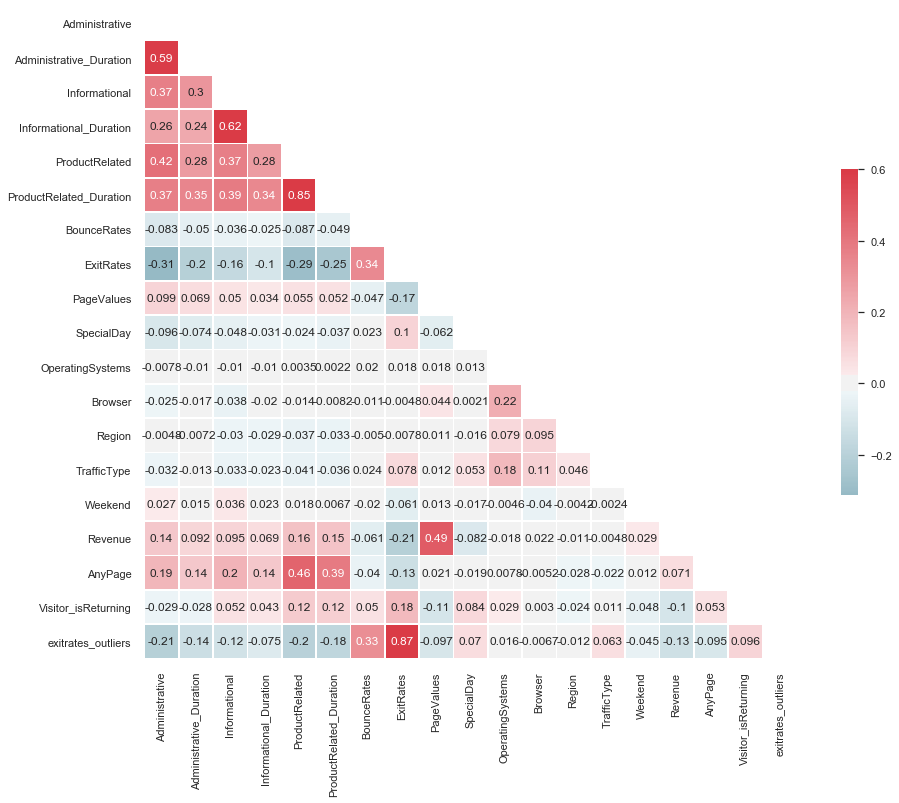

In [135]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(clean.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(clean.corr(), mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

plt.show()

In [143]:
print(f"After filling the NaN values, we can observe that our correlations vary in a {round(data.corr()['Revenue'].sort_values(ascending=False) - clean.corr()['Revenue'].sort_values(ascending=False), 3).sum() * 100}%")

After filling the NaN values, we can observe that our correlations vary in a 0.4%


In [137]:
clean.corr()['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.488899
ProductRelated             0.156765
ProductRelated_Duration    0.151475
Administrative             0.138412
Informational              0.094779
Administrative_Duration    0.091858
AnyPage                    0.071208
Informational_Duration     0.069007
Weekend                    0.029124
Browser                    0.022413
TrafficType               -0.004803
Region                    -0.011099
OperatingSystems          -0.018294
BounceRates               -0.061253
SpecialDay                -0.082305
Visitor_isReturning       -0.104191
exitrates_outliers        -0.128710
ExitRates                 -0.206669
Name: Revenue, dtype: float64

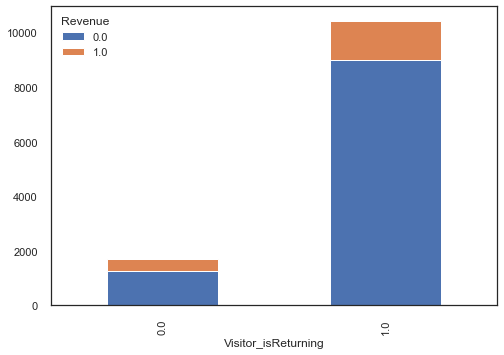

In [153]:
pd.crosstab(data['Visitor_isReturning'],data['Revenue']).plot(kind='bar',stacked=True)


In [ ]:
data['VisitorType']

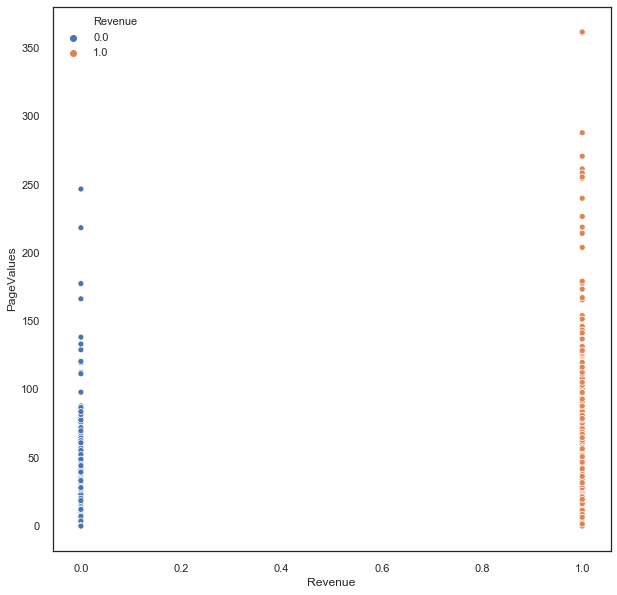

In [154]:
plt.figure(figsize=(10,10))
sns.scatterplot(data= data, x='Revenue', y='PageValues', hue='Revenue', cmap='coolwarm')

plt.show()

#### Correlation insights:

Make new column synthetizing the values of the non-correlated columns

# Individual work to organize

### Administrative_duration

- Data type: Categorical, ´object´. Necessary change to float.
- There are some values with multiple dots. Necessary to delete these dots.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 47.5% of sessions are coming from the category 0.0 of the Administrative_Duration

In [105]:
# Missing values

NA_values(data.Administrative_Duration)

Column name: Administrative_Duration
Total values: 12163
NA values: 167
% of NA values: 1.35%


In [106]:
# Fixing problems
# Drop dots from cells


0.000000       5805
4.000000       56  
5.000000       53  
7.000000       44  
11.000000      42  
6.000000       41  
14.000000      37  
9.000000       35  
15.000000      33  
10.000000      31  
13.000000      29  
19.000000      29  
12.000000      28  
21.000000      28  
3.000000       26  
8.000000       25  
18.000000      25  
17.000000      25  
20.000000      25  
37.000000      24  
23.000000      24  
33.000000      20  
26.000000      20  
32.000000      19  
47.000000      19  
34.000000      19  
36.000000      18  
16.000000      18  
29.000000      18  
28.000000      18  
42.000000      17  
45.000000      17  
44.000000      16  
63.000000      16  
38.000000      16  
30.000000      16  
60.000000      16  
22.000000      16  
27.000000      16  
91.000000      15  
2.000000       15  
23.200000      15  
57.000000      14  
52.000000      14  
24.000000      14  
55.000000      14  
75.000000      14  
54.500000      13  
67.500000      13  
25.000000      13  


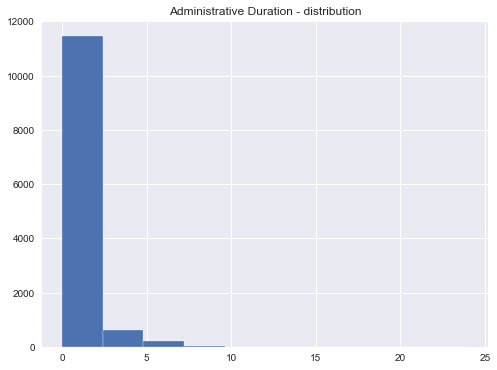

In [107]:
# Distribution

print(data.Administrative_Duration.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Administrative Duration - distribution")
plt.show()


In [108]:
percent_info_0 = data.Administrative_Duration.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Administrative_Duration pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the Administrative_Duration pages: 47.1


### BounceRates

- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 44.7% of sessions are coming from the category 0.0 of the BounceRates

In [109]:
# Missing values

NA_values(data.BounceRates)

Column name: BounceRates
Total values: 12216
NA values: 114
% of NA values: 0.92%


0.000000    5446
0.200000    691 
0.066667    134 
0.028571    114 
0.050000    111 
0.025000    100 
0.033333    100 
0.016667    99  
0.100000    97  
0.040000    95  
0.020000    90  
0.022222    87  
0.012500    83  
0.018182    81  
0.015385    76  
0.014286    73  
0.008333    72  
0.011111    62  
0.010000    61  
0.013333    54  
0.007692    53  
0.006667    51  
0.009524    49  
0.009091    47  
0.010526    45  
0.011765    44  
0.005556    42  
0.007407    39  
0.007143    34  
0.004545    34  
0.005000    31  
0.006250    31  
0.036364    30  
0.005128    30  
0.005405    29  
0.004762    29  
0.008696    29  
0.044444    28  
0.004167    27  
0.005263    27  
0.004348    27  
0.006452    27  
0.006061    26  
0.026667    26  
0.005714    26  
0.008000    25  
0.014815    25  
0.005882    25  
0.080000    24  
0.057143    24  
0.019048    23  
0.006897    23  
0.030769    22  
0.013793    21  
0.021053    21  
0.016000    21  
0.004444    21  
3.000000    20  
0.075000    19

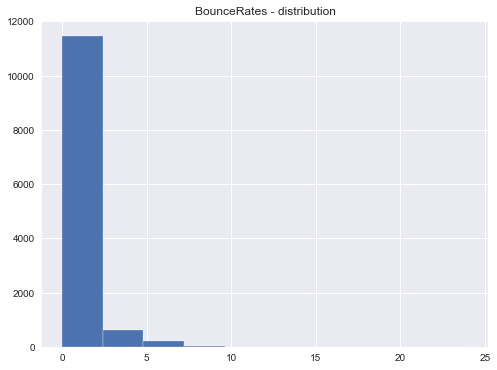

In [110]:
# Distribution

print(data.BounceRates.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("BounceRates - distribution")
plt.show()

In [111]:
percent_info_0 = data.BounceRates.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the BounceRates pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the BounceRates pages: 44.2


### OperatingSystems

In [112]:
# checking the no. of OSes each user is having??

- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 1 missing values, which is 0.01% out of all data. Will fill this cell with median
- 53.4% of sessions are coming from the category 2.0 of the OperatingSystems

In [113]:
# Missing values

NA_values(data.OperatingSystems)

Column name: OperatingSystems
Total values: 12211
NA values: 119
% of NA values: 0.97%


In [114]:
# transform 999 and ? to NaN

data.OperatingSystems.fillna(method= 'ffill')

0        1.0
1        2.0
2        4.0
3        3.0
4        3.0
5        2.0
6        2.0
7        1.0
8        2.0
9        2.0
10       1.0
11       1.0
12       1.0
13       2.0
14       3.0
15       1.0
16       1.0
17       1.0
18       2.0
19       2.0
20       2.0
21       3.0
22       3.0
23       2.0
24       2.0
25       1.0
26       2.0
27       1.0
28       2.0
29       3.0
30       1.0
31       1.0
32       2.0
33       1.0
34       2.0
35       2.0
36       3.0
37       2.0
38       2.0
39       2.0
40       2.0
41       1.0
42       1.0
43       3.0
44       4.0
45       2.0
46       1.0
47       3.0
48       3.0
49       2.0
50       1.0
51       3.0
52       2.0
53       4.0
54       3.0
55       2.0
56       3.0
57       2.0
58       2.0
59       2.0
60       1.0
61       1.0
62       1.0
63       2.0
64       2.0
65       2.0
66       4.0
67       2.0
68       2.0
69       3.0
70       2.0
71       2.0
72       2.0
73       2.0
74       2.0
75       2.0
76       2.0

2.0    6542
1.0    2556
3.0    2531
4.0    471 
8.0    79  
6.0    19  
7.0    7   
5.0    6   
Name: OperatingSystems, dtype: int64


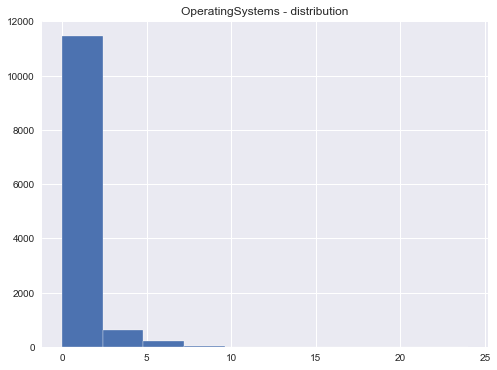

In [115]:
print(data.OperatingSystems.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("OperatingSystems - distribution")
plt.show()

In [116]:
percent_info_2 = data.OperatingSystems.value_counts()[2]/len(data)*100  
print(f'% of sessions in the category 2.0 of the OperatingSystems pages: {round(percent_info_2,1)}')

% of sessions in the category 2.0 of the OperatingSystems pages: 53.1


### Weekend

- Data type: Bool. Dtype change not necessary.
- Missing Values: There are no missing values.
- 76.7% of sessions are coming from the category False of the Weekend

In [117]:
# Missing values

NA_values(data.Weekend)

Column name: Weekend
Total values: 12310
NA values: 20
% of NA values: 0.16%


0.0    9446
1.0    2864
Name: Weekend, dtype: int64


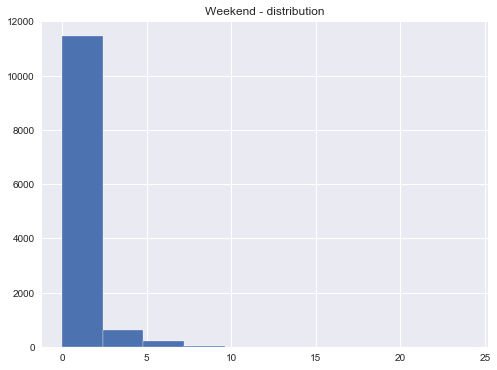

In [118]:
print(data.Weekend.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax = data.Informational.hist()
plt.title("Weekend - distribution")
plt.show()

In [119]:
percent_info_false = data.Weekend.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category False of the Weekend pages, not in weekend: {round(percent_info_0,1)}')

% of sessions in the category False of the Weekend pages, not in weekend: 44.2


### Kristina:

 - **Informational**
  - Data type: Categorical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be interpolated via a ffill, in order to preserve the actual distribution of the values.
  - 78.7% of sessions are coming from the category 0.0 of the Informational pages
  - No other changes are needed
 - **ExitRates**
  - Data type: Numerical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be filled with the median
  - Outliers: There are 1094 outliers, which is 8.87% of all data. The majority of the outliers are falling under the FALSE revenue category and under the 0.2 value of the Exit rates. Additional column will be created to be able to filter out the outliers if needed: exitrates_outliers (boolean values).
 - **Browser**
  - Data type: Categorical, integer. No changes
  - Missing Values: There are 100 missing values, which is 0.8% out of all data. It will be interpolated via a ffill, in order to preserve the actual distribution of the values.
  - The most popular browser is 2. The usage share is very similar to the standard Usage share of all browsers. Later on, in the data visualization, we will show more insights on this
  - There is one category identified with anegative number (-1.0) not sure if we need to change it.
  - No other changes are needed
 - **Revenue**
  - Data type: categorical, boolean. No changes
  - There are 2 categories, True and False
  - 84.53% of data falls under FALSE category of Revenue. Since it's a target column, the data will need to be equilibrated.
  - Trying to plot as kind='bar' loads too long, that's why use hist()

#### Informational

Column name: Informational
Total values: 12316
NA values: 14
% of NA values: 0.11%
0.0     9695
1.0     1041
2.0     727 
3.0     385 
4.0     222 
5.0     99  
6.0     78  
7.0     36  
9.0     15  
8.0     14  
10.0    7   
12.0    5   
14.0    2   
11.0    1   
16.0    1   
24.0    1   
13.0    1   
Name: Informational, dtype: int64


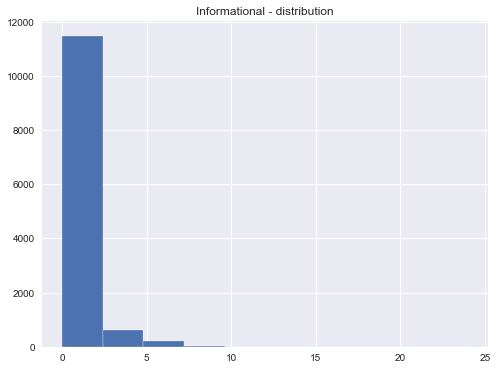

% of sessions in the category 0.0 of the Informational pages: 78.6


In [120]:
# Missing values

NA_values(data.Informational)

# Filling missing values

data.Informational.fillna(method='ffill', inplace=True)

# Distribution

print(data.Informational.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax = data.Informational.hist()
plt.title("Informational - distribution")
plt.show()

# % of sessions in category 0.0 

percent_info_0 = data.Informational.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Informational pages: {round(percent_info_0,1)}')

#### Exit Rates

Column name: ExitRates
Total values: 12316
NA values: 14
% of NA values: 0.11%


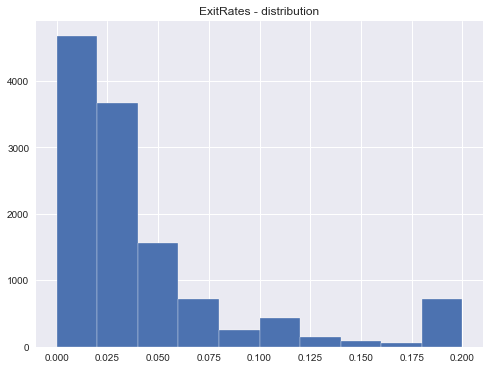

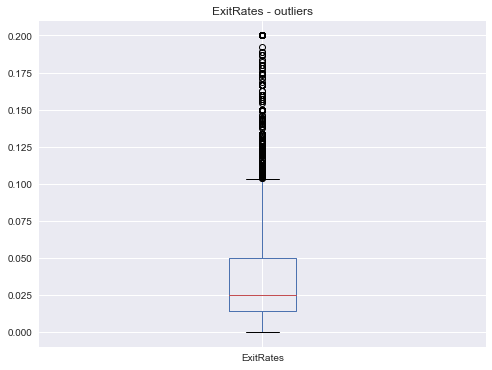

Column: ExitRates
Lower outliers: all values lower than -0.039
Upper outliers: all values higher than 0.104
Total number of rows with outliers: 1094
% of outliers: 8.87%
False    1087
True     6   
Name: Revenue, dtype: int64
0.200000    706
0.133333    67 
0.150000    59 
0.166667    25 
0.120000    23 
0.125000    18 
0.111111    15 
0.116667    14 
0.160000    13 
0.122222    9  
0.108333    8  
0.114286    8  
0.140000    6  
0.175000    6  
0.142857    5  
0.177778    5  
0.106667    4  
0.155556    4  
0.186667    4  
0.171429    3  
0.180000    3  
0.120833    3  
0.109091    3  
0.128571    3  
0.157143    3  
0.138889    2  
0.107143    2  
0.109524    2  
0.110000    2  
0.121429    2  
0.126667    2  
0.112500    2  
0.183333    2  
0.162500    2  
0.188889    2  
0.144444    2  
0.106000    1  
0.123810    1  
0.104242    1  
0.123413    1  
0.143750    1  
0.111765    1  
0.131579    1  
0.129580    1  
0.114815    1  
0.181818    1  
0.125641    1  
0.127273    1  
0.1466

In [121]:
# Missing values

NA_values(data.ExitRates)

# Filling missing values

data.ExitRates = data.ExitRates.fillna(data.ExitRates.median())

# Distribution

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax = data.ExitRates.hist()
plt.title("ExitRates - distribution")
plt.show()

# Outliers

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax = data.boxplot('ExitRates')
plt.title("ExitRates - outliers")
plt.show()

iqr(data, data.ExitRates)

# Checking the distribution of outliers regarding the target column - Revenue

exitrates_outliers = data.loc[(data.ExitRates > 0.104) | (data.ExitRates < -0.039)]
print(exitrates_outliers.Revenue.value_counts())

# Checking the top exit rate values of the outliers:

print(exitrates_outliers.ExitRates.value_counts())

# Creating a new column in the dataset to indicate exit rate outliers:
# Only using the upper IQR because the lower is a negative value and we don't have values lower tahn 0.

data['exitrates_outliers']  = data['ExitRates'].apply(lambda x: 'TRUE' if x > 0.104 else 'FALSE')

# Converting column to boolean

mapa = {'TRUE': True, 'FALSE': False}
data['exitrates_outliers'] = data['exitrates_outliers'].map(mapa)

#### Browser

Column name: Browser
Total values: 12210
NA values: 120
% of NA values: 0.97%
2.0     64.622871
1.0     19.935118
4.0     5.977291 
5.0     3.811841 
6.0     1.403082 
10.0    1.313869 
8.0     1.094891 
3.0     0.819140 
13.0    0.502839 
7.0     0.381184 
12.0    0.081103 
11.0    0.048662 
9.0     0.008110 
Name: Browser, dtype: float64


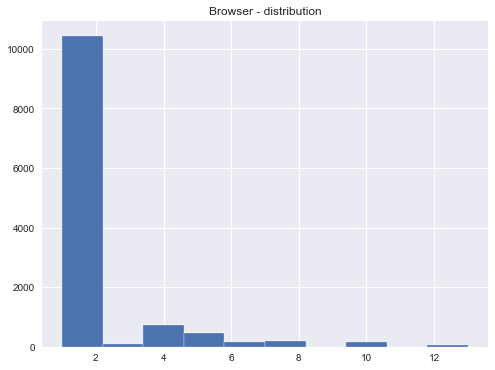

                  standard_usage_all
Chrome            64.92             
Safari            15.97             
Firefox           4.33              
Samsung_Internet  3.29              
UC                2.94              
Opera             2.34              
Edge              2.05              
IE                1.98              
AOSP              0.59              
Others            1.59              
                  standard_usage_mobile
Chrome            63.80                
Safari            19.70                
Firefox           0.35                 
Samsung_Internet  6.27                 
UC                5.33                 
Opera             2.48                 
Others            2.07                 


In [122]:
# Missing values

NA_values(data.Browser)

# Filling missing values

data.Browser.fillna(method='ffill', inplace=True)

# Distribution

print(data.Browser.value_counts(normalize = True)*100) 

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax = data.Browser.hist()
plt.title("Browser - distribution")
plt.show()

# Creating a dataset of the standard usage share of all browsers and of mobile browsers

usage_share_browsers = pd.DataFrame({'Chrome': 64.92, 'Safari': 15.97, 'Firefox': 4.33, 'Samsung_Internet': 3.29, 
                                     'UC': 2.94, 'Opera': 2.34, 'Edge': 2.05, 'IE': 1.98, 'AOSP': 0.59, 'Others': 1.59}, 
                                    index = [0]).T
colnames = ['standard_usage_all']
usage_share_browsers.columns = colnames
print(usage_share_browsers)

usage_share_browsers_mob = pd.DataFrame({'Chrome': 63.80, 'Safari': 19.70, 'Firefox': 0.35, 'Samsung_Internet': 6.27, 
                                     'UC': 5.33, 'Opera': 2.48, 'Others': 2.07}, 
                                    index = [0]).T
colnames = ['standard_usage_mobile']
usage_share_browsers_mob.columns = colnames
print(usage_share_browsers_mob)

#### Revenue

Column name: Revenue
Total values: 12330
NA values: 0
% of NA values: 0.0%
False    10422
True     1908 
Name: Revenue, dtype: int64


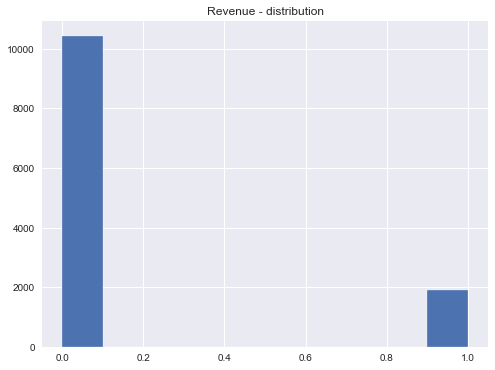

 84.53% of data falls under FALSE category of Revenue


In [123]:
# Missing values

NA_values(data.Revenue)

# Distribution

print(data.Revenue.value_counts())

# To plot a boolean variable, converting it to numeric

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax = data.Revenue.astype(float).hist()
plt.title("Revenue - distribution")
plt.show()

# How much data under False

print(f' {round(data.Revenue.value_counts(normalize = True)[0]*100, 2)}% of data falls under FALSE category of Revenue')

### Isaac:

    - Informational_Duration: There is a 'None' value so for this reason the type is an object.. We should change it to 0 and convert all the Series to float. In terms of missing values we got it covered (0.11%). We will fill them with the mean. 0.0% of outliers.
    - PageValues. Same as Informationa_Duration, we got an object called (#Nan). We should also change it and convert all the Series to float. Same for the missing values. 0.0% of outliers.
    - Region. There are only 9 regions. There are some with 'nan' or 'Nan'. My proposal is to remove whole cell as it will end up with bad results.

In [124]:
# Informational_Duration column

data[data['Informational_Duration'] == 'None'] = 0
data["Informational_Duration"] = pd.to_numeric(data["Informational_Duration"])

NA_values(data["Informational_Duration"])
iqr(data, data["Informational_Duration"])

Column name: Informational_Duration
Total values: 12184
NA values: 146
% of NA values: 1.18%
Column: Informational_Duration
Lower outliers: all values lower than nan
Upper outliers: all values higher than nan
Total number of rows with outliers: 0
% of outliers: 0.0%


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [125]:
# PageValues column

data[data['PageValues'] == '#Nan'] = 0
data["PageValues"] = pd.to_numeric(data["PageValues"])

NA_values(data["PageValues"])
iqr(data, data["PageValues"])

Column name: PageValues
Total values: 12210
NA values: 120
% of NA values: 0.97%
Column: PageValues
Lower outliers: all values lower than nan
Upper outliers: all values higher than nan
Total number of rows with outliers: 0
% of outliers: 0.0%


In [126]:
# Region column

#data[data['Region'] == 'nan']
#data[data['Region'] == 'Nan']

#data["Region"] = pd.to_numeric(data["Region"])
data.Region.value_counts()

1.0    4712
3.0    2386
4.0    1177
2.0    1125
6.0    801 
7.0    755 
9.0    508 
8.0    432 
5.0    314 
Name: Region, dtype: int64



### Pau:

    - ProductRelated:

    - SpecialDay:

    - TrafficType:


In [127]:
# ProductRelated column

# 1.09% NA --> filling method: median?:

NA_values(data.ProductRelated) 

data.ProductRelated = data.ProductRelated.fillna(data.ProductRelated.median()) 

# Outliers:

# dtype transformation: float to int

# data.ProductRelated.fillna(method='ffill')

Column name: ProductRelated
Total values: 12196
NA values: 134
% of NA values: 1.09%


In [128]:
# SpecialDay column

# 0.0% NA --> no filling needed:

NA_values(data.SpecialDay) 

# Outliers:

# dtype correct (float)


Column name: SpecialDay
Total values: 12330
NA values: 0
% of NA values: 0.0%


In [129]:
# TrafficType column

# 0.97% NA --> filling method: median?:

NA_values(data.TrafficType) 

data.TrafficType = data.TrafficType.fillna(data.TrafficType.median())

# Outliers:

# dtype transformation: float to int

data.TrafficType.value_counts()

Column name: TrafficType
Total values: 12210
NA values: 120
% of NA values: 0.97%


2.0     3993
1.0     2430
3.0     2033
4.0     1061
13.0    728 
10.0    447 
6.0     442 
8.0     338 
5.0     259 
11.0    242 
20.0    195 
9.0     42  
7.0     40  
15.0    36  
19.0    17  
14.0    13  
18.0    9   
16.0    3   
17.0    1   
12.0    1   
Name: TrafficType, dtype: int64

### Sosa:

    - Administrative:
        Due to the low number of missing values (0.28%), we'll fill them with the median of the values since its 
        impact won't be noticeable. We can't use mean because each value represents a category and should be
        assigned to an existing value. 
        Also, we can also see that the distribution of the values is a logarithmic one, left-skewed.
        There's 100 values 999. These are obvious errors. They're distributed evenly through the column. To
        fix this, we'll transform this 999 values into NaNs to interpolate them via a ffill, in order to preserve
        the actual distribution of the values.
        
    - ProductRelated_Duration
        In this column, we have negative values. The time of a person staying in a webpage cannot be
        negative, so we assume there's a error on the lecture. We'll be replacing them with '0' value.
        We have just two pronounced outliers. 
        Additionaly, we'll assing our NAs, 0,14% of the values, to the mean values since our continuous numeric
        values are equally distributed.
        
        
    - Month
        We have no NA values, but some wrong strings to classify the months. We'll fix this with Regex.
        No more transformation needed.
        
    - VisitorType
        We have four types of visitors: Returning, New, Other and More. In this case, we'll reduce the group
        to three types: Returning, New and Other, by merging the More column to Other.
        For the NA values, we have no way to know if the visitor is Returning or New, so we'll also group them
        with the 'Other' values.

In [130]:
## Administrative column

print(NA_values(data.Administrative))

data.Administrative = data.Administrative.fillna(data.Administrative.median())


data[data['Administrative'] == 999] = None

data.Administrative.fillna(method='ffill', inplace=True)

iqr(data, data.Administrative)



Column name: Administrative
Total values: 12196
NA values: 134
% of NA values: 1.09%
None
Column: Administrative
Lower outliers: all values lower than -6.0
Upper outliers: all values higher than 10.0
Total number of rows with outliers: 402
% of outliers: 3.26%


In [131]:
## ProductRelated_Duration column

print(NA_values(data.ProductRelated_Duration))

# Fixing outliers:

outliers = data.ProductRelated_Duration.sort_values(ascending=False)[:2]

data.query('ProductRelated_Duration == @outliers')['ProductRelated_Duration'] = data.ProductRelated_Duration.mean()

# Fixing the NA values:

data.ProductRelated_Duration = data.ProductRelated_Duration.fillna(data.ProductRelated_Duration.mean())

## ??? IQR for logarithmic distributions, are there outliers?

Column name: ProductRelated_Duration
Total values: 12283
NA values: 47
% of NA values: 0.38%
None


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3300: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term '__pd_eval_local_outliers', by more than 4.091; performance may suffer
  return _eval(expr, inplace=inplace, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [132]:
## Month column

NA_values(data.Month)

# Fixing strings:

data.Month = data.Month.str.replace('MAY', 'May').str.replace('March', 'Mar')

print(data.Month.value_counts())

print(data.Month.fillna(method='ffill').value_counts())

Column name: Month
Total values: 12330
NA values: 0
% of NA values: 0.0%
May     3372
Nov     2989
Mar     1921
Dec     1726
Oct     545 
Sep     444 
Aug     432 
Jul     431 
June    286 
Feb     184 
Name: Month, dtype: int64
May     3372
Nov     2989
Mar     1921
Dec     1726
Oct     545 
Sep     444 
Aug     432 
Jul     431 
June    286 
Feb     184 
Name: Month, dtype: int64


In [133]:
## VisitorType column

NA_values(data.VisitorType)

data.VisitorType = data.VisitorType.str.replace('More', 'Other').fillna('Other')

## ver si la columna tiene importancia, probar otras formas de tratar 'Other'

Column name: VisitorType
Total values: 12126
NA values: 204
% of NA values: 1.65%
